## Análise inicial dos dados

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
dados = pd.read_csv(r"C:\Users\gabri\OneDrive\Documentos\2 periodo\intro. cd\projetosiconf\dados_totais.csv",  encoding="utf-8")

In [42]:
dados

,Ano,Instituição,UF,População,Conta,Identificador da Conta,Valor
0,2021,Prefeitura Municipal de Manaus - AM,AM,2255903,RECEITAS CORRENTES (I),siconfi-cor_ReceitasCorrentesLiquidasExcetoTra...,7.819839e+08
1,2021,Prefeitura Municipal de Manaus - AM,AM,2255903,"Impostos, Taxas e Contribuições de Melhoria",siconfi-cor_ReceitaTributariaLiquidaExcetoTran...,2.688272e+08
2,2021,Prefeitura Municipal de Manaus - AM,AM,2255903,IPTU,siconfi-cor_IPTULiquidoExcetoTransferenciasEFU...,1.491228e+08
3,2021,Prefeitura Municipal de Manaus - AM,AM,2255903,ISS,siconfi-cor_ISSLiquidoExcetoTransferenciasEFUNDEB,8.225389e+07
4,2021,Prefeitura Municipal de Manaus - AM,AM,2255903,ITBI,siconfi-cor_ITBILiquidoExcetoTransferenciasEFU...,8.944698e+06
...,...,...,...,...,...,...,...
30204,2023,Prefeitura Municipal de Cuiabá - MT,MT,618124,Compensações Financ. entre Regimes Previdência,siconfi-cor_CompensacaoFinanceiraEntreRegimesP...,1.101957e+07
30205,2023,Prefeitura Municipal de Cuiabá - MT,MT,618124,Dedução de Receita para Formação do FUNDEB,siconfi-cor_DeducaoDeReceitaParaFormacaoDoFUNDEB,1.415646e+08
30206,2023,Prefeitura Municipal de Cuiabá - MT,MT,618124,RECEITA CORRENTE LÍQUIDA (III) = (I - II),siconfi-cor_RREO3ReceitaCorrenteLiquida,2.747358e+09
30207,2023,Prefeitura Municipal de Cuiabá - MT,MT,618124,RECEITA CORRENTE LÍQUIDA AJUSTADA PARA CÁLCULO...,siconfi-cor_RREO3ReceitaCorrenteLiquidaAjustad...,2.747358e+09


In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

print(dados)

In [47]:
dados.describe()

,Ano,População,Valor
count,"30,209.00","30,209.00","30,209.00"
mean,"2,021.98","1,891,847.88","375,508,189.15"
std,0.82,"2,528,806.94","2,490,792,141.93"
min,"2,021.00","306,296.00","-64,925,679.27"
25%,"2,021.00","548,952.00","5,250,070.54"
50%,"2,022.00","1,031,597.00","27,088,756.10"
75%,"2,023.00","1,963,726.00","144,153,327.77"
max,"2,023.00","12,396,372.00","86,570,289,142.11"


In [50]:
# Medidas de Centralidade
media = dados['Valor'].mean()
mediana = dados['Valor'].median()
moda = dados['Valor'].mode()

# Medidas de Dispersão
amplitude = dados['Valor'].max() - dados['Valor'].min()
variancia = dados['Valor'].var()
desvio_padrao = dados['Valor'].std()
coeficiente_variacao = dados['Valor'].std() / dados['Valor'].mean()

print("Média:", media)
print("Mediana:", mediana)
print("Moda:", moda)
print("Amplitude:", amplitude)
print("Variância:", variancia)
print("Desvio Padrão:", desvio_padrao)
print("Coeficiente de Variação:", coeficiente_variacao)


Média: 375508189.15311396
Mediana: 27088756.1
Moda: 0    30,677.55
1   100,000.00
Name: Valor, dtype: float64
Amplitude: 86635214821.38
Variância: 6.204045494278312e+18
Desvio Padrão: 2490792141.9255986
Coeficiente de Variação: 6.633123361551976


In [51]:
# Medidas de Centralidade
media = dados['População'].mean()
mediana = dados['População'].median()
moda = dados['População'].mode()

# Medidas de Dispersão
amplitude = dados['População'].max() - dados['População'].min()
variancia = dados['População'].var()
desvio_padrao = dados['População'].std()
coeficiente_variacao = dados['População'].std() / dados['População'].mean()

print("Média:", media)
print("Mediana:", mediana)
print("Moda:", moda)
print("Amplitude:", amplitude)
print("Variância:", variancia)
print("Desvio Padrão:", desvio_padrao)
print("Coeficiente de Variação:", coeficiente_variacao)


Média: 1891847.8791419775
Mediana: 1031597.0
Moda: 0    6775561
Name: População, dtype: int64
Amplitude: 12090076
Variância: 6394864521010.923
Desvio Padrão: 2528806.936286541
Coeficiente de Variação: 1.336686191404273


In [58]:
# Removendo outliers
dados = dados[(dados['Valor'] < dados['Valor'].quantile(0.95))]
dados = dados[(dados['População'] < dados['População'].quantile(0.95))]

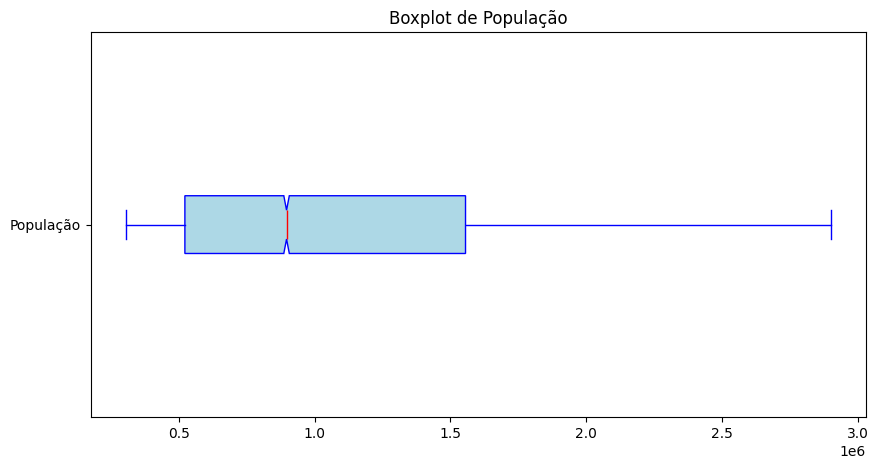

In [70]:
plt.figure(figsize=(10, 5))
plt.boxplot(dados['População'], notch=True, vert=False, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            medianprops=dict(color='red'),
            whiskerprops=dict(color='blue'),
            capprops=dict(color='blue'),
            flierprops=dict(marker='o', color='blue', alpha=0.5))

plt.yticks([1], ['População'])
plt.title('Boxplot de População')
plt.show()

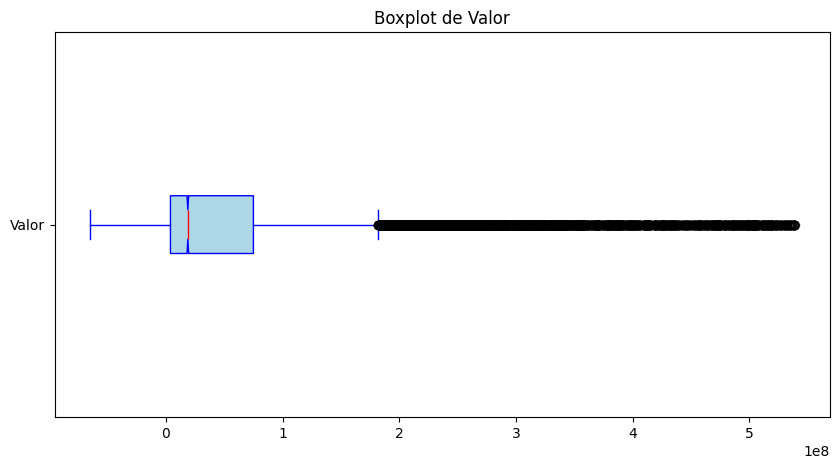

In [69]:
plt.figure(figsize=(10, 5))
plt.boxplot(dados['Valor'], notch=True, vert=False, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            medianprops=dict(color='red'),
            whiskerprops=dict(color='blue'),
            capprops=dict(color='blue'),
            flierprops=dict(marker='o', color='blue', alpha=0.5))

plt.yticks([1], ['Valor'])
plt.title('Boxplot de Valor')
plt.show()